<h2>Haberman Dataset EDA</h2><br>

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Attribute Information:

Age of patient at time of operation (numerical)<br>
Patient's year of operation (year - 1900, numerical)<br>
Number of positive axillary nodes detected (numerical)<br>
Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 year

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<h3>Information about the dataset</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


<h3>Number of rows and columns in the dataset</h3>

In [ ]:
df.shape

(306, 4)

<h3>Number of people who survived and who did not (1 = survived, 2 = did not survive)</h3>

In [ ]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

**Observation**
<li>It is an imbalanced dataset</li>


<h3>How many years of data</h3>

In [ ]:
print(sorted(df['year'].unique())) #Prints all unique years
print("Total of years:",len(df['year'].unique()),"( from",df['year'].min(),"to",df['year'].max(),')')

[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69]
Total of years: 12 ( from 58 to 69 )


<h3>Objectives</h3>


<ul>
<li>Find the factors that are responsible for the death of an individual due to cancer.</li>
<li>How is age related to a person's survival status?</li>
<li>How is no. of nodes related to a person's survival status?</li>
</ul>

<h2>Univariate analysis</h2>

<h3>Probability density function of 'nodes' with 'status' as hue</h3>

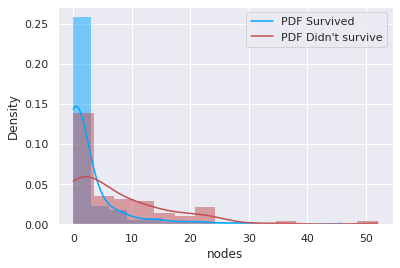

In [ ]:
sns.histplot(df.loc[(df['status']==1),'nodes'], color='#00a6ff',alpha = 0.5,stat='density',kde = True,linewidth = 0,bins = 15)
sns.histplot(df.loc[(df['status']==2),'nodes'], color='r',alpha = 0.5,stat='density',kde = True,linewidth = 0,bins = 15)
plt.legend(['PDF Survived','PDF Didn\'t survive'])

**Observations**
<li>We can observe that as the number of nodes increase there is a sharp decrease in the probability of survival</li>
<li>People having 6 or less nodes have a significantly higher chance of survival</li>

<h3>Probability density function of 'age' with 'status' as hue</h3>

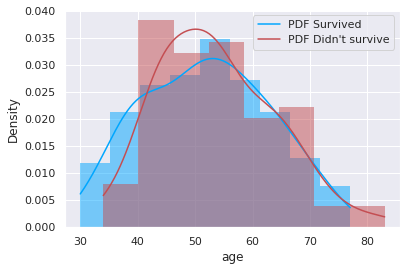

In [ ]:
sns.histplot(df.loc[(df['status']==1),'age'], color='#00a6ff',alpha = 0.5,stat='density',kde = True,linewidth = 0)
sns.histplot(df.loc[(df['status']==2),'age'], color='r',alpha = 0.5,stat='density',kde = True,linewidth = 0)
plt.legend(['PDF Survived','PDF Didn\'t survive'])

**Observations**
<li>There is a higher chance of survival for people aged below 40</li>

<h3>Cumulative distribution function of 'nodes' with 'status' as hue</h3>

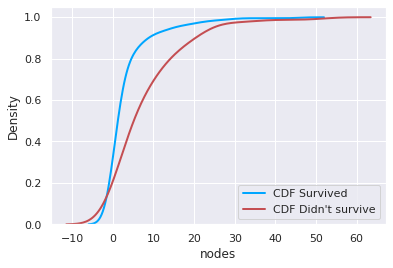

In [ ]:
sns.kdeplot(df.loc[(df['status']==1),'nodes'], color='#00a6ff',cumulative=True,linewidth = 2)
sns.kdeplot(df.loc[(df['status']==2),'nodes'], color='r',cumulative=True,linewidth = 2)
plt.legend(['CDF Survived','CDF Didn\'t survive'])
plt.show()

**Observations**
<li>Approximately 80% of the people who survived had less than 5 nodes</li>
<li>Approximately 40% of the people who died had less than 5 nodes</li>

<h3>Cumulative distribution function of 'age' with 'status' as hue</h3>

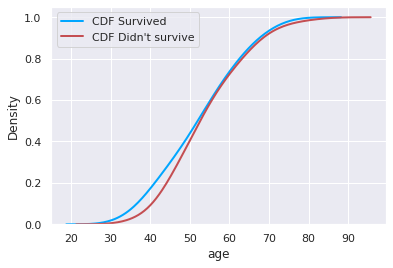

In [ ]:
sns.kdeplot(df.loc[(df['status']==1),'age'], color='#00a6ff',cumulative=True,linewidth = 2)
sns.kdeplot(df.loc[(df['status']==2),'age'], color='r',cumulative=True,linewidth = 2)
plt.legend(['CDF Survived','CDF Didn\'t survive'])
plt.show()

**Observations**
<li>Approximately 20% of the people who survived were aged less than or equal to 40</li>
<li>Approximately 10% of the people who died were aged less than or equal to 40</li>

<h3>Box Plot of 'nodes' with 'status' as hue</h3>

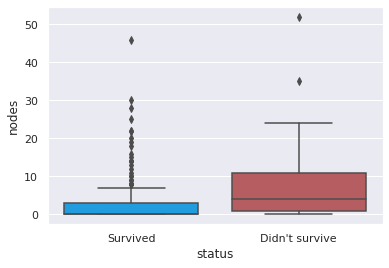

In [ ]:
data=df.replace({"status" : {1 : "Survived", 2 : "Didn't survive"}})
sns.boxplot(x='status',y='nodes', data=data,palette=['#00a6ff','r'])
plt.show()

**Observations**
<li>Approximately 50% people who survived have 0 nodes</li>
<li>Approximately 75% people who survived have less than 3 nodes</li>
<li>Approximately 50% people who died have 4 or more nodes</li>
<li>There are a lot of outliers in the survival data</li>

<h3>Box Plot of 'age' with 'status' as hue</h3>

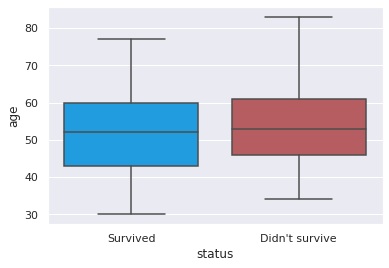

In [ ]:
sns.boxplot(x='status',y='age', data=data,palette=['#00a6ff','r'])
plt.show()

**Observations**
<li>The 25th percentile value of age for those who survived is around 43</li>
<li>The 25th percentile value of age for those who died is around 47</li>
<li>There is a lot of overlap in both the boxplots</li>

<h3>Violin Plot of 'nodes' with 'status' as hue</h3>

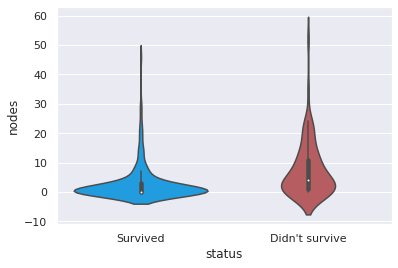

In [ ]:
sns.violinplot(x='status',y='nodes', data=data,palette=['#00a6ff','r'])
plt.show()

**Observations**
<li>For the people who survived there is a high probability that they have 0 to 1 nodes</li>

<h3>Violin Plot of 'age' with 'status' as hue</h3>

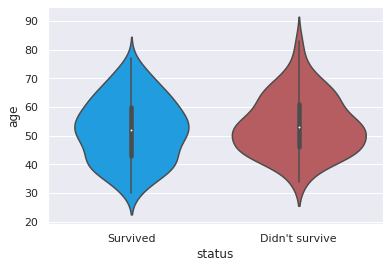

In [ ]:
sns.violinplot(x='status',y='age', data=data,palette=['#00a6ff','r'])
plt.show()

**Observations**
<li>Most ages in the dataset are between 40 to 60</li>

<h2>Bivariate analysis<h2/>


<h3>Pairplot with 'status' as hue<h3>

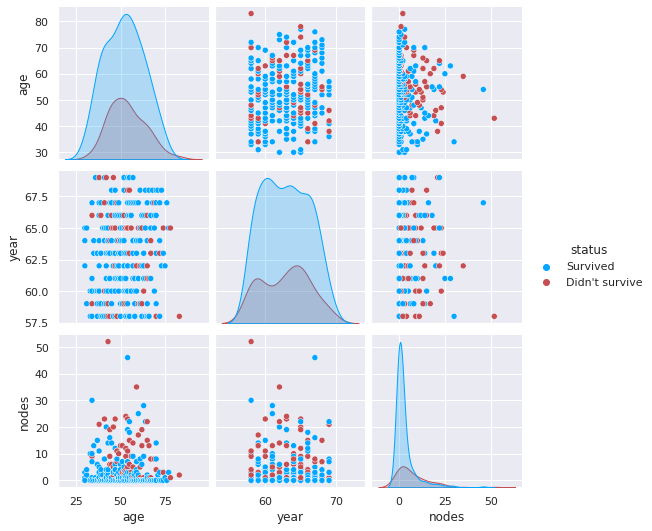

In [ ]:
sns.pairplot(data,hue = 'status',palette=['#00a6ff','r'])
plt.show()

**Observations**
<li>There is a visible relationship between age, number of nodes and the chance of survival</li>
<li>There is no relation between the year of operation and the chance of survival</li>

<h3>Scatterplot between 'age' and 'nodes' with 'status' as hue</h3>

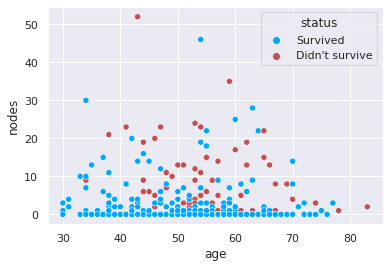

In [ ]:
sns.scatterplot(x=df['age'],y =df['nodes'],hue=data['status'],palette=['#00a6ff','r'])

**Observations**
<li>People below 40 have a higher chance of survival even if they have more number of nodes</li>

<h2>Overall Conclusions</h2>


<h3>From Univariate Analysis (PDFs, CDfs, Box Plots, and Violin Plots)</h3>

<ol>
<li>As the number of nodes increase there is a sharp decrease in life expectancy</li>
<li>Approximately half of the people who survived had 0 nodes</li>
<li>People having 6 or less nodes have a significantly higher chance of survival</li>
<li>People aged below 40 have a higher chance of survival</li>
</ol>


<h3>From Bivariate Analysis(Pair Plots and Scatterplots)</h3>

<ol>
<li>From the pairplots we can see that there is a visible relationship between age, number of nodes and the chance of survival</li>
<li>People below 40 have a higher chance of survival even if they have more number of nodes</li>
</ol>